Kite application v1 program

In [1]:
import logging
import json


Kite specific includes 

In [5]:
from kiteconnect import KiteConnect


* Check why debugging !!!
* api_key can be received from the kite connect app

In [6]:
logging.basicConfig(level=logging.DEBUG)
kite = KiteConnect(api_key="v1w7029zlz5daycp")

Run this only once to get the access token and save the access token

In [7]:
url = kite.login_url()
print(url)

https://kite.trade/connect/login?api_key=v1w7029zlz5daycp&v=3


In [8]:
data = kite.generate_session("SOnNJ6neq5mRTH1xGEooTfKfS0Of4cJr", api_secret="2dzsdypnfa44rm2sfr6cr17va0ic07fd")
print(data["access_token"])

kite.set_access_token(data["access_token"])

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "POST /session/token HTTP/1.1" 200 None


bblcMoPx3vjza2cOu4D9L0ehCv3fLlFp


--------------------------------------------------
Functionalities can start from here 
* Run the cells from here after getting the access tokens

I think instruments is derving all the information (instrument token, trading symbol, last proce, etc) from the NSE database. Instruments might be a synonym for stocks that can be traded 

In [12]:
kite.instruments(exchange='NSE')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/NSE?exchange=NSE HTTP/1.1" 200 149895


[OrderedDict([('instrument_token', 258313),
              ('exchange_token', '1009'),
              ('tradingsymbol', 'CPSE INDEX'),
              ('name', 'CPSE INDEX'),
              ('last_price', 0.0),
              ('expiry', ''),
              ('strike', 0.0),
              ('tick_size', 0.0),
              ('lot_size', 0),
              ('instrument_type', 'EQ'),
              ('segment', 'INDICES'),
              ('exchange', 'NSE')]),
 OrderedDict([('instrument_token', 264713),
              ('exchange_token', '1034'),
              ('tradingsymbol', 'HANGSENG BEES-NAV'),
              ('name', 'HANGSENG BEES-NAV'),
              ('last_price', 0.0),
              ('expiry', ''),
              ('strike', 0.0),
              ('tick_size', 0.0),
              ('lot_size', 0),
              ('instrument_type', 'EQ'),
              ('segment', 'INDICES'),
              ('exchange', 'NSE')]),
 OrderedDict([('instrument_token', 264969),
              ('exchange_token', '1035'),
    

How to get historical data
* Seems instrument token is necessary for getting the data about a stock
* def historical_data(	self, instrument_token, from_date, to_date, interval, continuous=False, oi=False)

pandas.core.frame.DataFrame

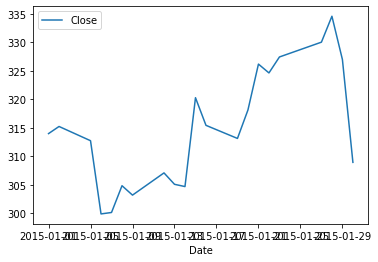

In [7]:
from nsepy import get_history
from datetime import date
import matplotlib as plt
import nsepy
data = get_history(symbol="SBIN", start=date(2015,1,1), end=date(2015,1,31))
data[['Close']].plot()
type(data)
nsepy.live()

Issue: https://kite.trade/forum/discussion/3379/insufficient-permission-for-that-call-while-retrieving-historical-information